In [1]:
## import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import geopandas


In [2]:
# import datasets and transform to dataframes
df_senators = pd.read_excel('Senator_candidates.xlsx')
df_users = pd.read_excel('users.xlsx')
df_tweets = pd.read_excel('tweets.xlsx')
df_replies = pd.read_excel('replies.xlsx')

/Users/nikosgalanos/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [3]:
# fix senators dataframe
df_senators = df_senators[df_senators['TwitterId'] != 'No Account']
df_senators.columns = [c.replace(' ', '_') for c in df_senators.columns]

# Candidates Analysis

## Number of Senators in our Dataset (exc. those with No Twitter Account)

In [4]:
df_senators.Candidate.count()

94

## Number of Senators per Party

<AxesSubplot: >

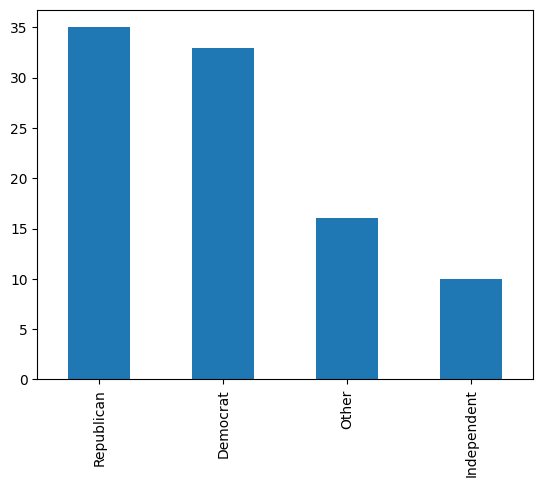

In [8]:
df_senators.Party.value_counts().plot(kind='bar')

In [15]:
#creating dataframes per party to use in further analysis (could be useful in the future, otherwise delete)
df_democrats = df_senators[df_senators['Party'] == 'Democrat']
df_republicans = df_senators[df_senators['Party'] == 'Republican']
df_independent = df_senators[df_senators['Party'] == 'Independent']
df_other_party = df_senators[df_senators['Party'] == 'Other']

## Number of Senators per State and Number of States examined

<AxesSubplot: >

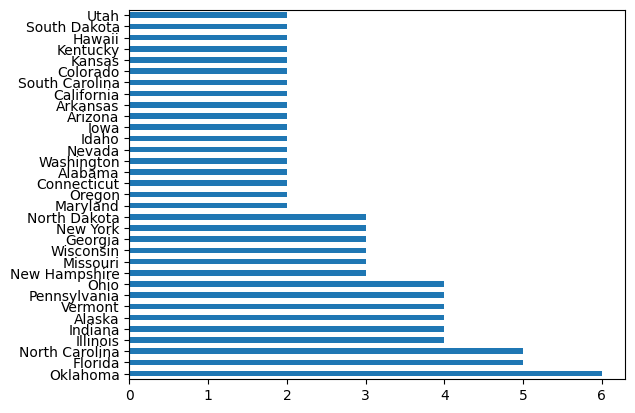

In [16]:
df_senators.State.value_counts().plot(kind='barh')

In [6]:
df_replies.tweetId.unique().size

41435

## Number of Candidates Serving / Non Serving Currently

In [18]:
df_senators.Currently_Serving.value_counts()

0    67
1    27
Name: Currently_Serving, dtype: int64

In [19]:
#same but per party
#Democrats
df_democrats.Currently_Serving.value_counts()

0    20
1    13
Name: Currently_Serving, dtype: int64

In [20]:
#Republicans
df_republicans.Currently_Serving.value_counts()

0    21
1    14
Name: Currently_Serving, dtype: int64

In [21]:
#Independent
df_independent.Currently_Serving.value_counts()

0    10
Name: Currently_Serving, dtype: int64

In [22]:
#Other Party
df_other_party.Currently_Serving.value_counts()

0    16
Name: Currently_Serving, dtype: int64

In [23]:
#here is my failed attempt to do the colored map
import plotly.graph_objects as go

fig = go.Figure(go.Scattergeo())
fig.update_geos(
    visible=False, resolution=110, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


### Map of current situation
Source: https://ballotpedia.org/United_States_Senate_elections,_2022

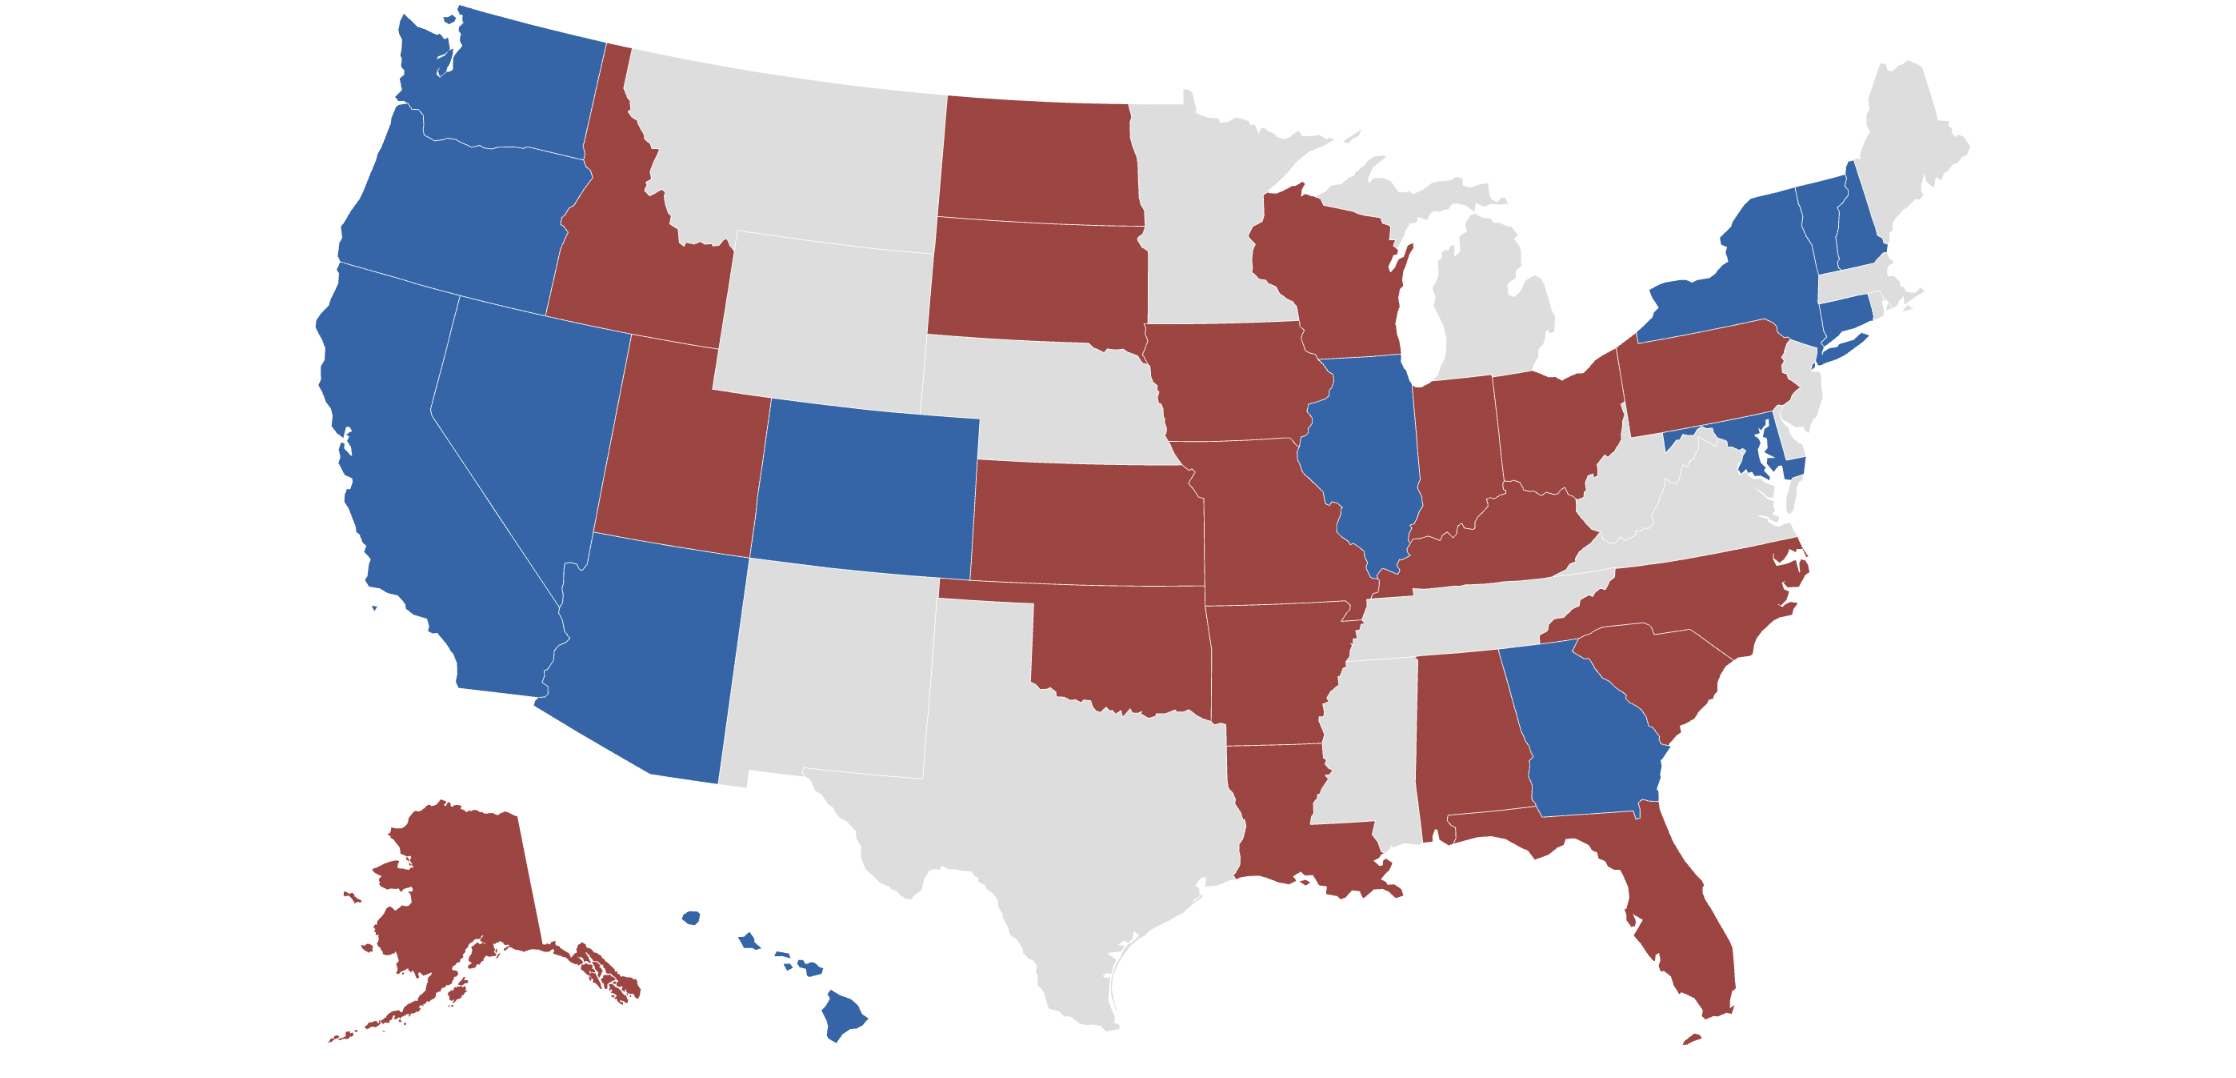

# Tweets Analysis

## Number of Tweets (in total / per senator / per party)

In [24]:
df_tweets.tweetId.count()

9621

In [25]:
df_tweets.username.value_counts()

EvanMcMullin       200
TheOtherMandela    200
jeremykauffman     200
HaneefahKhaaliq    200
AlexPadilla4CA     200
                  ... 
JohnsonUSSenate     16
FeenaBonoan         14
DrRickBecker         7
Stephen_Faris        4
CrisEricson2022      2
Name: username, Length: 88, dtype: int64

<AxesSubplot: title={'center': 'Tweets per Senator'}, ylabel='Senator'>

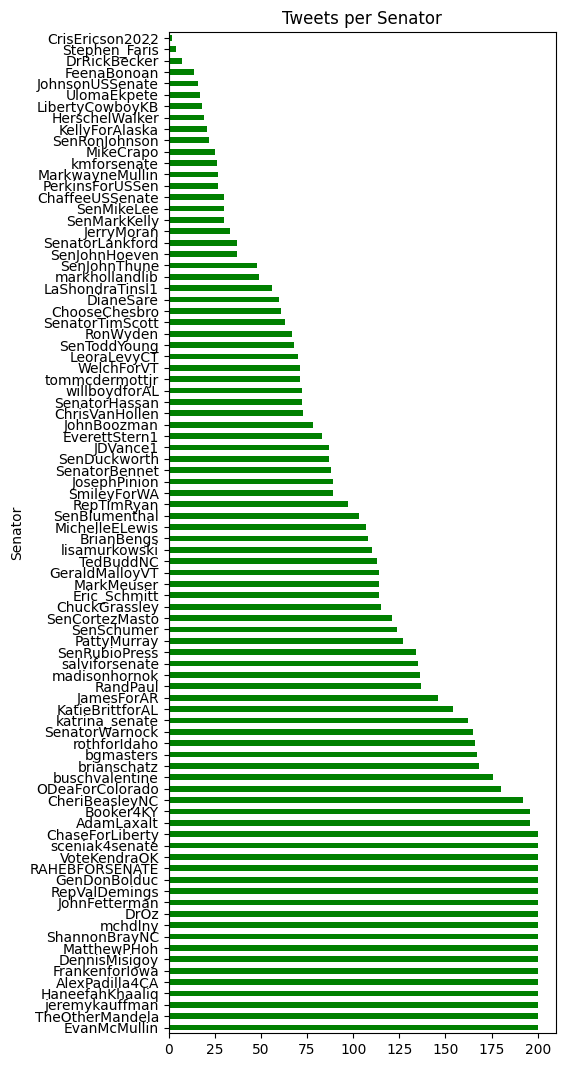

In [17]:
#this is the above results plotted
df_tweets.username.value_counts().plot(kind='barh', figsize=(5, 13), ylabel = '# of Tweets', xlabel = 'Senator', title = 'Tweets per Senator', color = 'green')

In [26]:
#some dataframe manipulation to help on analysis
df_senators.rename(columns = {'TwitterId':'username'}, inplace = True)
df_tweets = pd.merge(df_tweets, df_senators[["username", "Party", "State"]], on="username", how="left")

<AxesSubplot: >

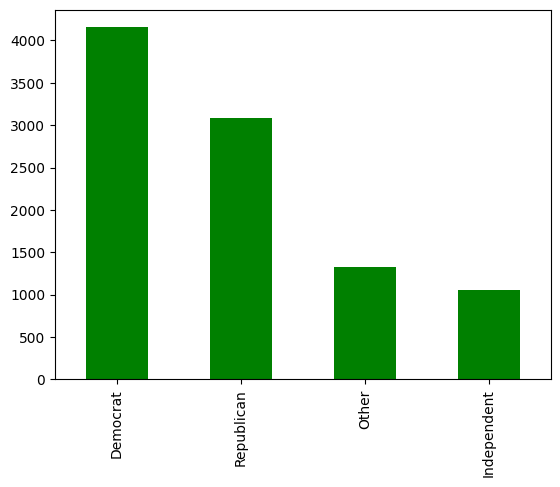

In [28]:
#Tweets per party
df_tweets.Party.value_counts().plot(kind='bar', color = 'green')

<AxesSubplot: title={'center': 'Tweets per Party'}, ylabel='Party'>

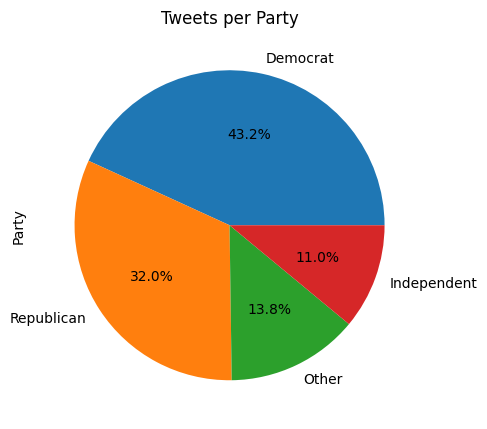

In [20]:
#Plotted the above
df_tweets.Party.value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize = (5,10), title = 'Tweets per Party')

In [21]:
#Tweets per State
df_tweets.State.value_counts()

North Carolina    812
Oklahoma          618
Florida           551
Indiana           539
Pennsylvania      499
New Hampshire     472
Vermont           387
Georgia           384
Kentucky          333
Nevada            317
Iowa              315
California        314
Missouri          290
New York          273
Colorado          268
Ohio              244
Utah              230
Alabama           226
Arkansas          224
Illinois          222
Wisconsin         222
Washington        216
North Dakota      206
Arizona           197
Alaska            192
Idaho             191
Hawaii            182
Connecticut       173
South Dakota      156
Maryland          103
Oregon             94
South Carolina     89
Kansas             82
Name: State, dtype: int64

<AxesSubplot: title={'center': 'Tweets per State'}>

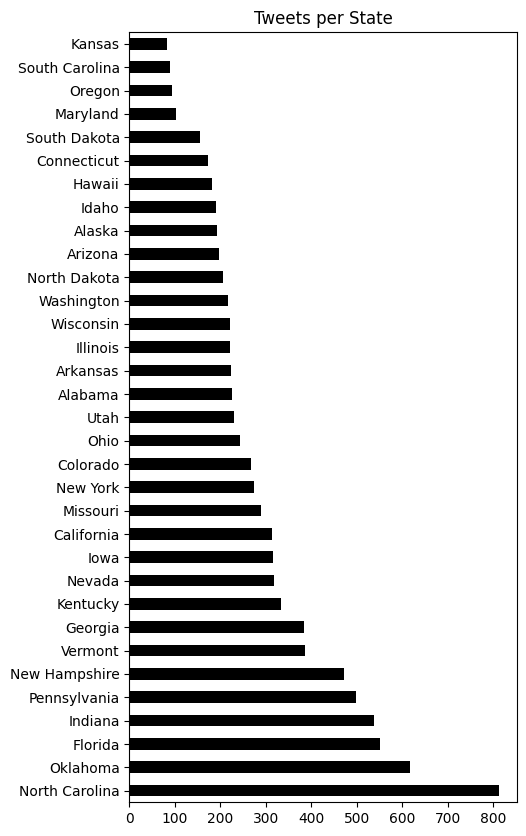

In [22]:
#Plotted the above
df_tweets.State.value_counts().plot(kind = 'barh', title = 'Tweets per State', figsize = (5,10), color = 'black')

## Top Tweets based on likes, replies, retweets (5,10,50,100,1000)

In [23]:
#here i made various dataframes that we can use for further analysis (focus on 5,10,50,100,1000) /
#top tweets per likes / replies / retweets

top5_tweets_likes = df_tweets.sort_values(by=['favorites'], ascending = False).head(5)
top10_tweets_likes = df_tweets.sort_values(by=['favorites'], ascending = False).head(10)
top20_tweets_likes = df_tweets.sort_values(by=['favorites'], ascending = False).head(20)
top50_tweets_likes = df_tweets.sort_values(by=['favorites'], ascending = False).head(50)
top100_tweets_likes = df_tweets.sort_values(by=['favorites'], ascending = False).head(100)
top1000_tweets_likes = df_tweets.sort_values(by=['favorites'], ascending = False).head(1000)

In [24]:
top5_tweets_replies = df_tweets.sort_values(by=['replies'], ascending = False).head(5)
top10_tweets_replies = df_tweets.sort_values(by=['replies'], ascending = False).head(10)
top20_tweets_replies = df_tweets.sort_values(by=['replies'], ascending = False).head(20)
top50_tweets_replies = df_tweets.sort_values(by=['replies'], ascending = False).head(50)
top100_tweets_replies = df_tweets.sort_values(by=['replies'], ascending = False).head(100)
top1000_tweets_replies = df_tweets.sort_values(by=['replies'], ascending = False).head(1000)

In [25]:
top5_tweets_retweets = df_tweets.sort_values(by=['retweets'], ascending = False).head(5)
top10_tweets_retweets = df_tweets.sort_values(by=['retweets'], ascending = False).head(10)
top20_tweets_retweets = df_tweets.sort_values(by=['retweets'], ascending = False).head(20)
top50_tweets_retweets = df_tweets.sort_values(by=['retweets'], ascending = False).head(50)
top100_tweets_retweets = df_tweets.sort_values(by=['retweets'], ascending = False).head(100)
top1000_tweets_retweets = df_tweets.sort_values(by=['retweets'], ascending = False).head(1000)

In the following 3 cells we can see that Pennsylvania and Kentucky have the most twitter engagement

In [26]:
top1000_tweets_likes.State.value_counts()

Pennsylvania      237
Kentucky          161
North Carolina     70
Florida            64
Wisconsin          63
Utah               55
Arizona            53
Iowa               40
Missouri           32
New York           30
Hawaii             27
Washington         26
Oklahoma           25
Ohio               24
Georgia            22
Illinois           14
Nevada             13
California         11
South Dakota        8
Idaho               6
New Hampshire       6
South Carolina      4
Connecticut         3
Colorado            2
Vermont             1
Oregon              1
Arkansas            1
Maryland            1
Name: State, dtype: int64

In [27]:
top1000_tweets_replies.State.value_counts()

Pennsylvania      304
Kentucky          135
Iowa               76
Washington         72
Wisconsin          60
Arizona            51
New York           48
Missouri           47
Utah               37
Ohio               36
Florida            23
North Carolina     19
Georgia            18
South Carolina     17
Nevada             11
Illinois           10
California          9
Hawaii              7
Oklahoma            5
New Hampshire       4
Connecticut         3
South Dakota        3
Colorado            2
Kansas              1
Vermont             1
Indiana             1
Name: State, dtype: int64

In [28]:
top1000_tweets_retweets.State.value_counts()

Pennsylvania      232
Kentucky          143
North Carolina     87
Wisconsin          73
Florida            70
Iowa               49
Arizona            48
Utah               48
Missouri           37
Oklahoma           31
New York           23
Ohio               22
Hawaii             20
Georgia            19
Nevada             16
Illinois           14
California         14
Washington         14
Idaho              14
South Dakota       13
Connecticut         4
South Carolina      2
New Hampshire       2
Oregon              1
Maryland            1
Alaska              1
Arkansas            1
Colorado            1
Name: State, dtype: int64

## Wordclouds

In [29]:
## function to create wordclouds, parameters can be adjusted (e.g font, stopwords etc)
# Using this we can analyze any given text dataset

def create_wordcloud(text):
    allWords = ' '.join([tweets for tweets in text])
    stopwords = set(STOPWORDS)
    stopwords.update(['https', ':', '//', "will", "u", 'www', 'com', 't', 'co', 's', 'amp'])
    wordCloud = WordCloud(stopwords = stopwords, background_color='white', width=800, height=500, random_state=21).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()

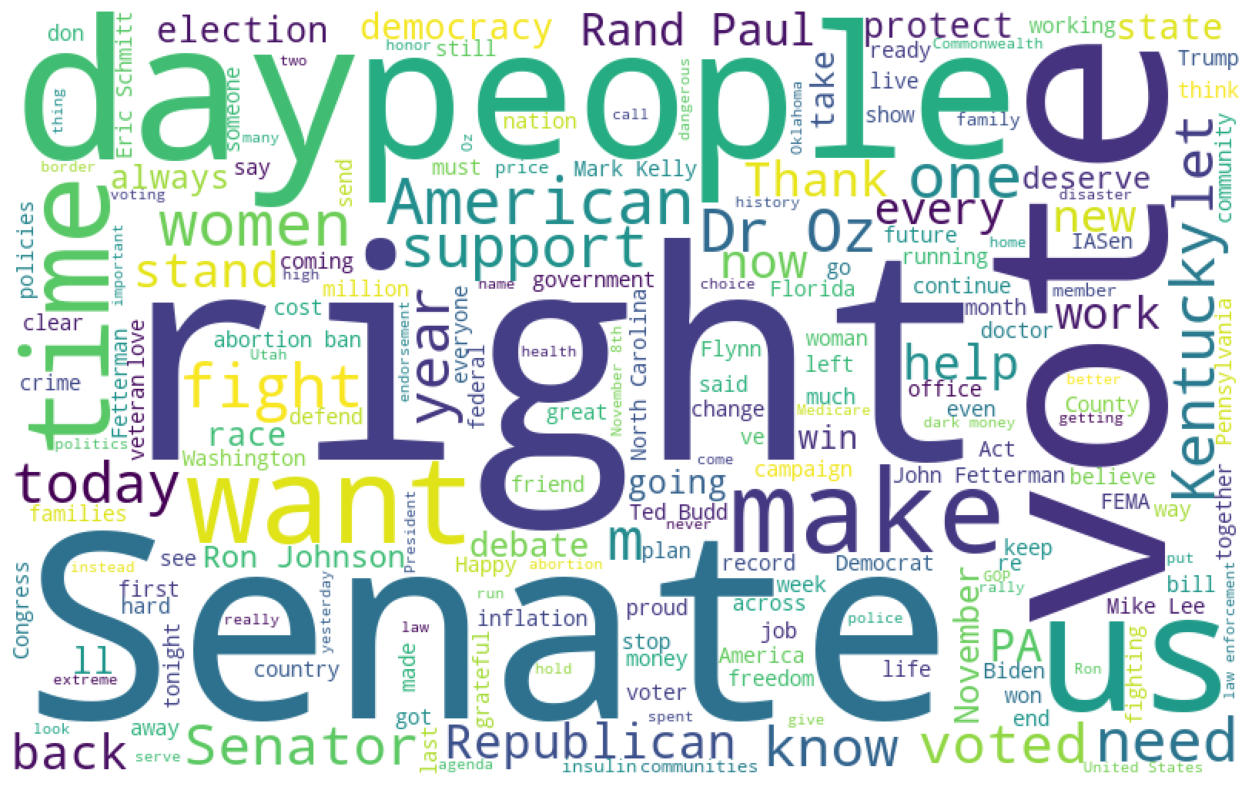

In [30]:
# top 1000 per like
create_wordcloud(top1000_tweets_likes.text)

In [31]:
# top 1000 per replies
create_wordcloud(top1000_tweets_replies.text)

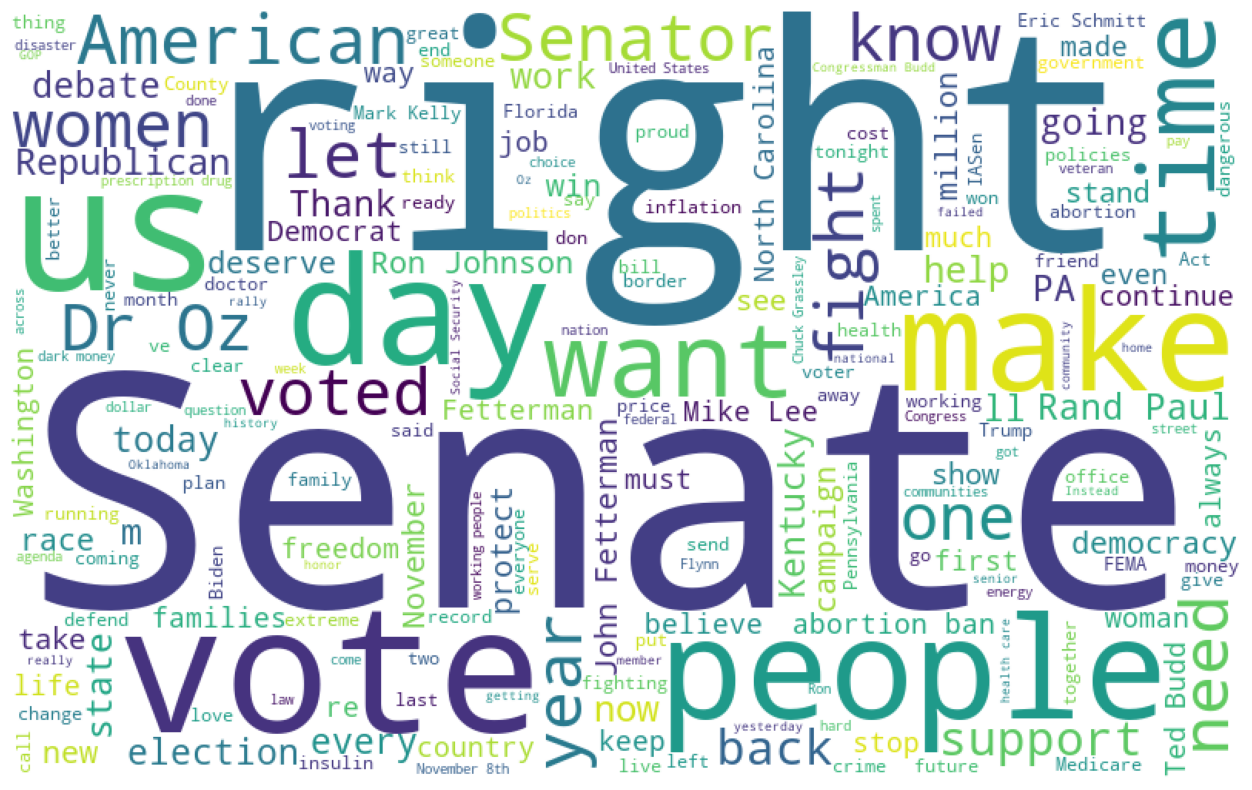

In [32]:
# top 1000 per retweets
create_wordcloud(top1000_tweets_retweets.text)

# Users Analysis

## Verified Users

In [33]:
df_users.verified.value_counts()

True     82
False    11
Name: verified, dtype: int64

In [34]:
#We might want to delete that but its basically followers per user (senator)

sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(100, 50))

users = df_users.sort_values("followers_count", ascending=False)

sns.set_color_codes("pastel")
sns.barplot(x="username", y="followers_count", data=users,
            label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x="username", y="followers_count", data=users,
            label="Followers per User", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 70), xlabel="",
       ylabel="Followers per User")
sns.despine(left=True, bottom=True)

In [35]:
## Lists of top 5,10,20,50,100 Senators by number of Followers

top5_senators_followers = df_users.sort_values(by=['followers_count'], ascending = False).head(5)
top10_senators_followers = df_users.sort_values(by=['followers_count'], ascending = False).head(10)
top20_senators_followers = df_users.sort_values(by=['followers_count'], ascending = False).head(20)
top50_senators_followers = df_users.sort_values(by=['followers_count'], ascending = False).head(50)
top100_senators_followers = df_users.sort_values(by=['followers_count'], ascending = False).head(100)

In [36]:
## Lists of top 5,10,20,50,100 Senators by number of tweets posted

top5_tweet_posted = df_users.sort_values(by=['tweet_count'], ascending = False).head(5)
top10_tweet_posted = df_users.sort_values(by=['tweet_count'], ascending = False).head(10)
top20_tweet_posted = df_users.sort_values(by=['tweet_count'], ascending = False).head(20)
top50_tweet_posted = df_users.sort_values(by=['tweet_count'], ascending = False).head(50)
top100_tweet_posted = df_users.sort_values(by=['tweet_count'], ascending = False).head(100)

In [37]:
## Graph of Top 5 most followed profiles

top5_senators_followers.plot(kind = 'bar', x='username', y='followers_count', ylim = (100000,9000000), color = 'forestgreen')

<AxesSubplot: xlabel='username'>

<AxesSubplot: xlabel='username'>

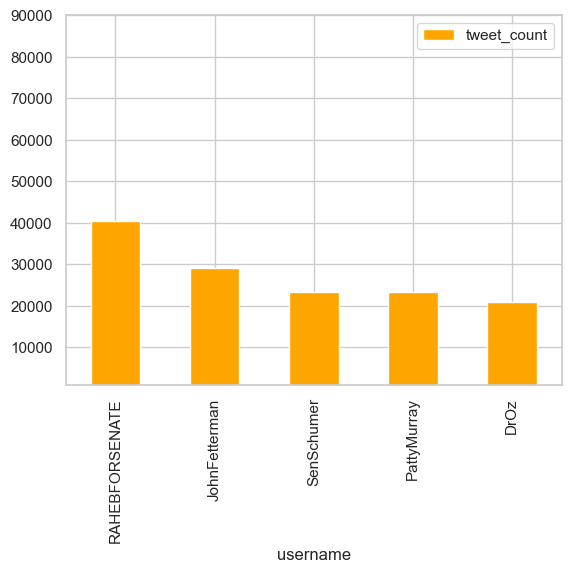

In [38]:
## Graph of Top 5 most frequent posting profiles

top5_tweet_posted.plot(kind = 'bar', x='username', y='tweet_count', ylim = (1000,90000), color = 'orange')

# Replies Analysis

## Senator Tweets with most replies in our dataset

In [39]:
senator_tweets_max_replies = df_replies.replyTo.value_counts().to_frame()

## User Tweets with most replies/likes/retweets in our dataset

In [40]:
## Similarly with before

top5_user_tweets_replies = df_replies.sort_values(by=['replies'], ascending = False).head(5)
top10_user_tweets_replies = df_replies.sort_values(by=['replies'], ascending = False).head(10)
top20_user_tweets_replies = df_replies.sort_values(by=['replies'], ascending = False).head(20)
top50_user_tweets_replies = df_replies.sort_values(by=['replies'], ascending = False).head(50)
top100_user_tweets_replies = df_replies.sort_values(by=['replies'], ascending = False).head(100)
top1000_user_tweets_replies = df_replies.sort_values(by=['replies'], ascending = False).head(1000)

In [41]:
top5_user_tweets_likes = df_replies.sort_values(by=['favorites'], ascending = False).head(5)
top10_user_tweets_likes = df_replies.sort_values(by=['favorites'], ascending = False).head(10)
top20_user_tweets_likes = df_replies.sort_values(by=['favorites'], ascending = False).head(20)
top50_user_tweets_likes = df_replies.sort_values(by=['favorites'], ascending = False).head(50)
top100_user_tweets_likes = df_replies.sort_values(by=['favorites'], ascending = False).head(100)
top1000_user_tweets_likes = df_replies.sort_values(by=['favorites'], ascending = False).head(1000)

In [42]:
top5_user_tweets_retweets = df_replies.sort_values(by=['retweets'], ascending = False).head(5)
top10_user_tweets_retweets = df_replies.sort_values(by=['retweets'], ascending = False).head(10)
top20_user_tweets_retweets = df_replies.sort_values(by=['retweets'], ascending = False).head(20)
top50_user_tweets_retweets = df_replies.sort_values(by=['retweets'], ascending = False).head(50)
top100_user_tweets_retweets = df_replies.sort_values(by=['retweets'], ascending = False).head(100)
top1000_user_tweets_retweets = df_replies.sort_values(by=['retweets'], ascending = False).head(1000)

## Top Users Based on Followers

In [43]:
#Similarly with before

top5_people_followers = df_replies.sort_values(['followers']).groupby(['username'],sort=False)['followers'].unique().tail(5).to_frame()
top10_people_followers = df_replies.sort_values(['followers']).groupby(['username'],sort=False)['followers'].unique().tail(10).to_frame()
top20_people_followers = df_replies.sort_values(['followers']).groupby(['username'],sort=False)['followers'].unique().tail(20).to_frame()
top50_people_followers = df_replies.sort_values(['followers']).groupby(['username'],sort=False)['followers'].unique().tail(50).to_frame()
top100_people_followers = df_replies.sort_values(['followers']).groupby(['username'],sort=False)['followers'].unique().tail(100).to_frame()

In [44]:
#fixing value for user with 2 values on followers
top5_people_followers.iloc[4,0] = 1250475

#Need to do the same for the rest (10,20, 50, 100 etc. if we want to plot more)


In [45]:
#transform to numeric
for i in range(0,4):
    top5_people_followers.iloc[i,0] = int(top5_people_followers.iloc[i,0])

<AxesSubplot: xlabel='username'>

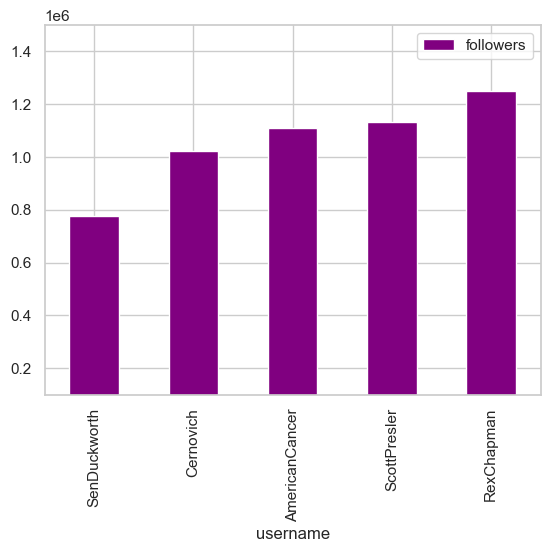

In [46]:
#plot top 5
top5_people_followers.plot(kind = 'bar', use_index = True, y='followers', ylim = (100000,1500000), color = 'purple')